# ANOVA

ANOVA compares the mean across groups. Each group is the data for each target class.

- [Feature Selection in Machine Learning Book](https://www.trainindata.com/p/feature-selection-in-machine-learning-book)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import (
    f_classif,
    SelectFpr,
    SelectKBest,
)
from sklearn.model_selection import train_test_split

In [2]:
# load dataset

X, y = load_breast_cancer(return_X_y=True, as_frame=True)

# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
293,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
332,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
278,13.59,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263
489,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.18,26.56,127.30,1084.0,0.1009,0.29200,0.24770,0.08737,0.4677,0.07623


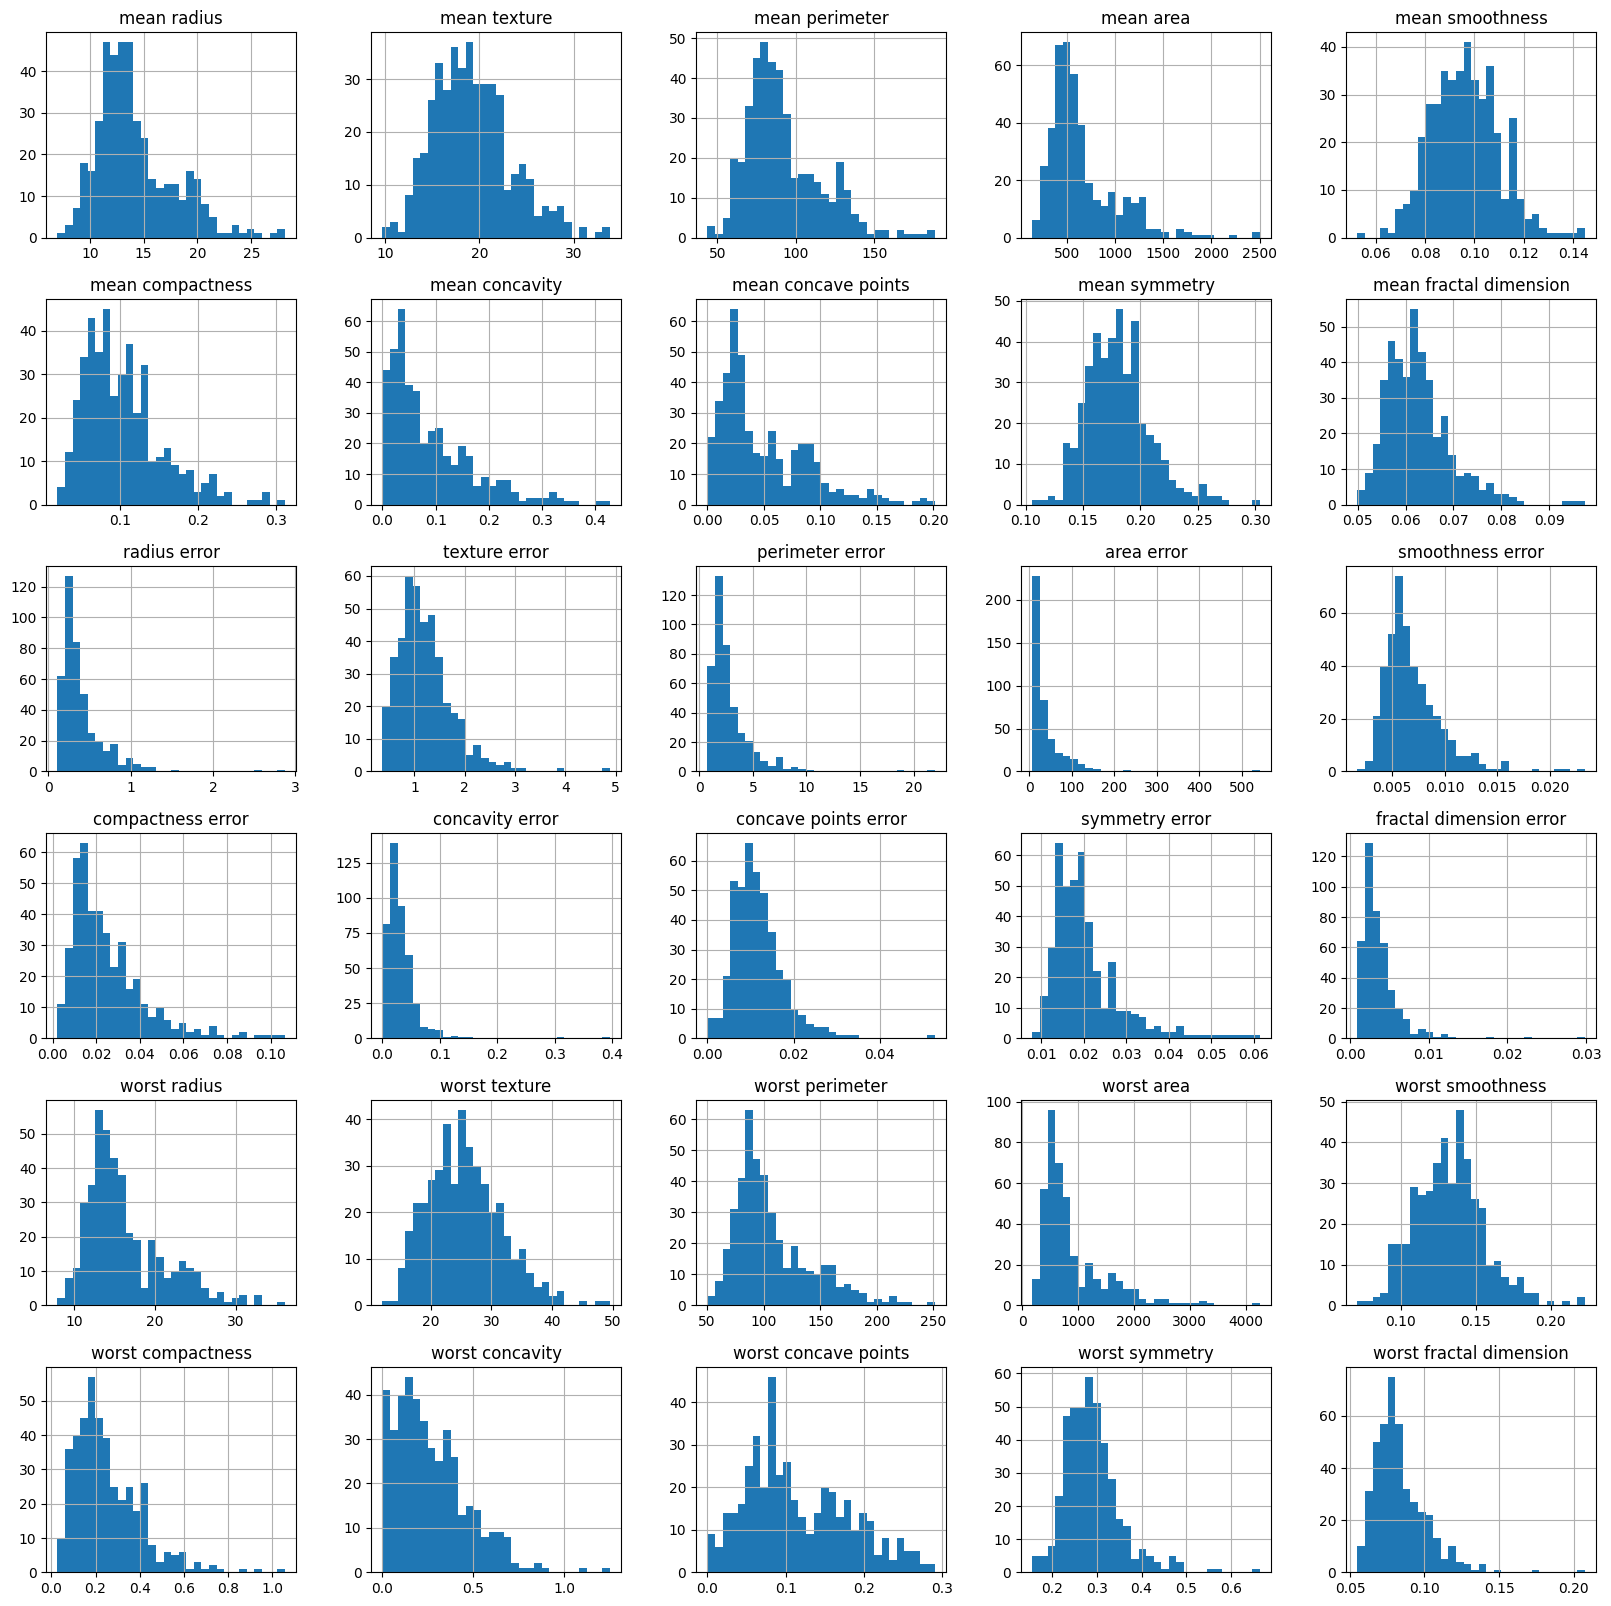

In [3]:
X_train.hist(bins=30, figsize=(20,20))
plt.show()

## ANOVA

In [4]:
# on the entire data

univariate = f_classif(X_train, y_train)

# the output is one array with f-scores
# and one array with the pvalues

univariate

(array([4.56888468e+02, 8.07899168e+01, 4.90890258e+02, 3.94647061e+02,
        6.91090732e+01, 2.51091933e+02, 3.77169033e+02, 6.40392388e+02,
        5.64534892e+01, 2.32061889e-01, 1.89198831e+02, 4.60132652e-01,
        1.77794821e+02, 1.61603286e+02, 3.44368683e+00, 3.19209297e+01,
        1.52804441e+01, 6.90719571e+01, 3.73129536e-01, 1.22007037e+00,
        6.11484676e+02, 1.04059005e+02, 6.34234486e+02, 4.60094540e+02,
        9.71806726e+01, 2.42990980e+02, 3.24298240e+02, 7.30475928e+02,
        9.36811856e+01, 4.94480861e+01]),
 array([2.55823842e-69, 8.37108067e-18, 8.19690935e-73, 1.48052645e-62,
        1.27734112e-15, 9.49913611e-45, 1.45377554e-60, 8.98762428e-87,
        3.44436651e-13, 6.30247708e-01, 7.43308506e-36, 4.97932018e-01,
        4.06310902e-34, 1.36320509e-31, 6.41875480e-02, 2.94961572e-08,
        1.07859166e-04, 1.29817853e-15, 5.41630631e-01, 2.69973265e-01,
        3.11012794e-84, 5.36444219e-22, 3.08095116e-86, 1.18230031e-69,
        8.87987480e-21

Text(0.5, 1.0, 'Anova')

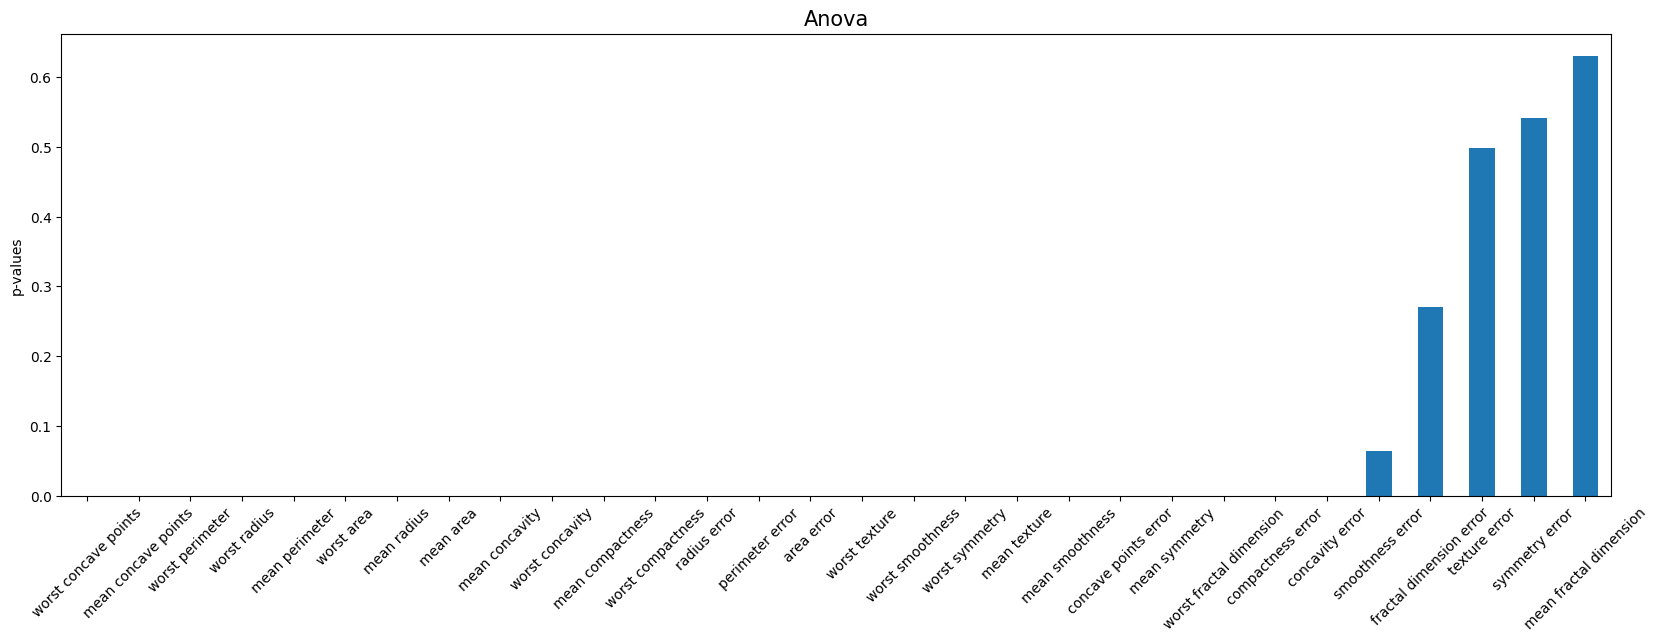

In [5]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

plt.rc('axes', titlesize=15) #fontsize of the title
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=True).plot.bar(figsize=(20, 6), rot=45)
plt.ylabel('p-values')
plt.title('Anova')

The smaller the p_value the more predictive the feature is.

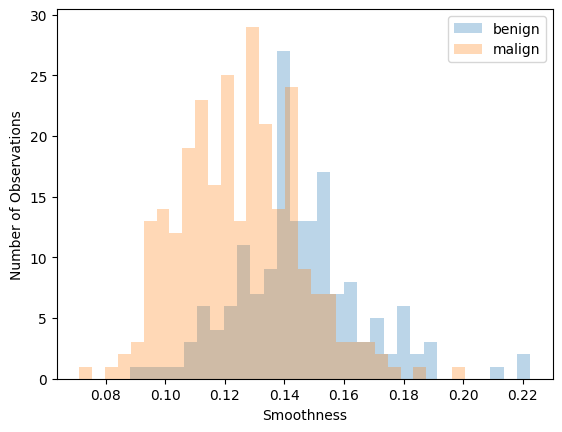

In [6]:
# variable with small p-value
sample1 = X_train.loc[y_train==0, "worst smoothness"]
sample2 =  X_train.loc[y_train==1, "worst smoothness"]

plt.hist(sample1, bins=30, alpha=0.3, label="benign")
plt.hist(sample2, bins=30, alpha=0.3, label="malign")
plt.legend(loc='upper right')
plt.xlabel('Smoothness')
plt.ylabel('Number of Observations')
plt.show()

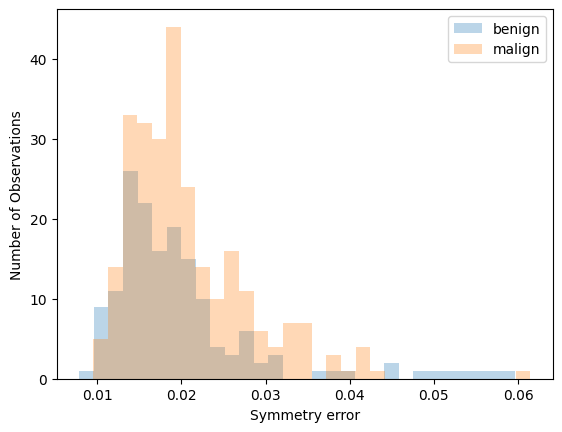

In [7]:
# variable with big p-value

sample1 = X_train.loc[y_train==0, "symmetry error"]
sample2 =  X_train.loc[y_train==1, "symmetry error"]

plt.hist(sample1, bins=30, alpha=0.3, label="benign")
plt.hist(sample2, bins=30, alpha=0.3, label="malign")
plt.legend(loc='upper right')
plt.xlabel('Symmetry error')
plt.ylabel('Number of Observations')
plt.show()

## Select features based on p-values

In [8]:
# select features with p-value < 0.05

sel = SelectFpr(f_classif, alpha=0.05).set_output(transform="pandas")

sel.fit(X_train, y_train)

# Display selected feature names
X_train.columns[sel.get_support()]

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'radius error',
       'perimeter error', 'area error', 'compactness error', 'concavity error',
       'concave points error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [9]:
# Number of selectead features

len(sel.get_feature_names_out())

25

In [10]:
# remove low ranking features:

X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,radius error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
293,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.2070,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
332,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.2976,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.7655,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
278,13.59,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.2580,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263
489,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.2473,...,19.18,26.56,127.30,1084.0,0.1009,0.29200,0.24770,0.08737,0.4677,0.07623


## Select top ranking features

In [11]:
sel = SelectKBest(f_classif, k=10).set_output(transform="pandas")

sel.fit(X_train, y_train)

# Display selected feature names
X_train.columns[sel.get_support()]

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')

In [12]:
# remove low ranking features:

X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.head()

,mean radius,mean perimeter,mean area,mean concavity,mean concave points,worst radius,worst perimeter,worst area,worst concavity,worst concave points
293,11.85,75.54,432.7,0.026880,0.022800,13.06,84.35,517.8,0.13160,0.09140
332,11.22,71.94,387.3,0.005006,0.007583,11.98,76.91,436.1,0.01335,0.02022
565,20.13,131.20,1261.0,0.144000,0.097910,23.69,155.00,1731.0,0.32150,0.16280
278,13.59,86.24,572.3,0.019970,0.012380,15.50,98.91,739.1,0.10600,0.05185
489,16.69,107.10,857.6,0.036490,0.023070,19.18,127.30,1084.0,0.24770,0.08737
